**Nguyễn Chí Thành - 1812712**

**Lê Quang Bảo Sơn - 18127198**

# 1. GIỚI THIỆU

### Trong đồ án này nhóm sẽ khám phá dữ liệu của các tác phẩm NFT trên Opensea platform .

## 1.1 NFT

NFT (Non-fungible token) là một loại tài sản số sử dụng công nghệ blockchain (chuỗi khối) để tạo ra một chuỗi mã độc nhất đại diện cho một vật phẩm nào đó và không thể thay thế. Một NFT có thể đại diện cho bất cứ thứ gì, từ âm nhạc, nghệ thuật,..

 ![ví dụ](https://gomoney.vn/wp-content/uploads/2021/06/Picture2.png)


* Tính độc nhất: mỗi NFT có tính chất riêng, khiến chúng khác biệt so với những NFT khác. 

* Tính khan hiếm: mỗi NFT là duy nhất, không thể thay thế bằng bất cứ hình thức nào khác, chính điều đó tạo nên giá trị cho các NFT. Ví dụ: các món đồ càng độc đáo, khan hiếm thì giá trị càng cao, như các bức tranh được vẽ bởi những họa sĩ nổi tiếng: Mona Lisa – Leonardo da Vinci, The Starry Night – Vincent van Gogh…

* Không thể tách rời: một đặc tính đặc biệt của NFT là không thể chia NFT dưới bất kỳ hình thức nào

## 1.2 Opensea

Opensea là 1 marketplace plaform để những người sở hữu các sản phẩm NFT trao đổi mua bán trực tiếp với nhau mà không cần phải qua bên thứ 3, chỉ cần trả phí giao dịch để duy trì mạng lưới.

Các sản phẩm trên Opensea đa dạng từ tác phẩm nghệ thuật, gaming, âm nhạc , ... miễn là nó được tạo từ nền tảng NFT.

 ![ví dụ](https://merehead.com/blog/wp-content/uploads/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA-%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0-2021-07-19-%D0%B2-14.06.08.png)

## 1.3 Axie Infinity Collection

**Như đã biết thì gần đây VTV đã đưa tin tựa game NFT Axie Infinity là tựa game việt đầu tiên đạt giá trị vốn hóa 1 tỷ USD và cũng là tựa game NFT trên web và dApp lớn nhất hiện giờ . Tại thời điểm bây giờ thì vốn hóa đã đạt được là 4 tỷ USD.Trong game này, người chơi sẽ mua những thú cưng( NFT item) để nuôi, sau khi nuôi và sinh sản thành công thì thú cưng được sinh ra có thể bán lấy tiền hoặc để tiếp tục chăn nuôi. Link game https://axieinfinity.com/**

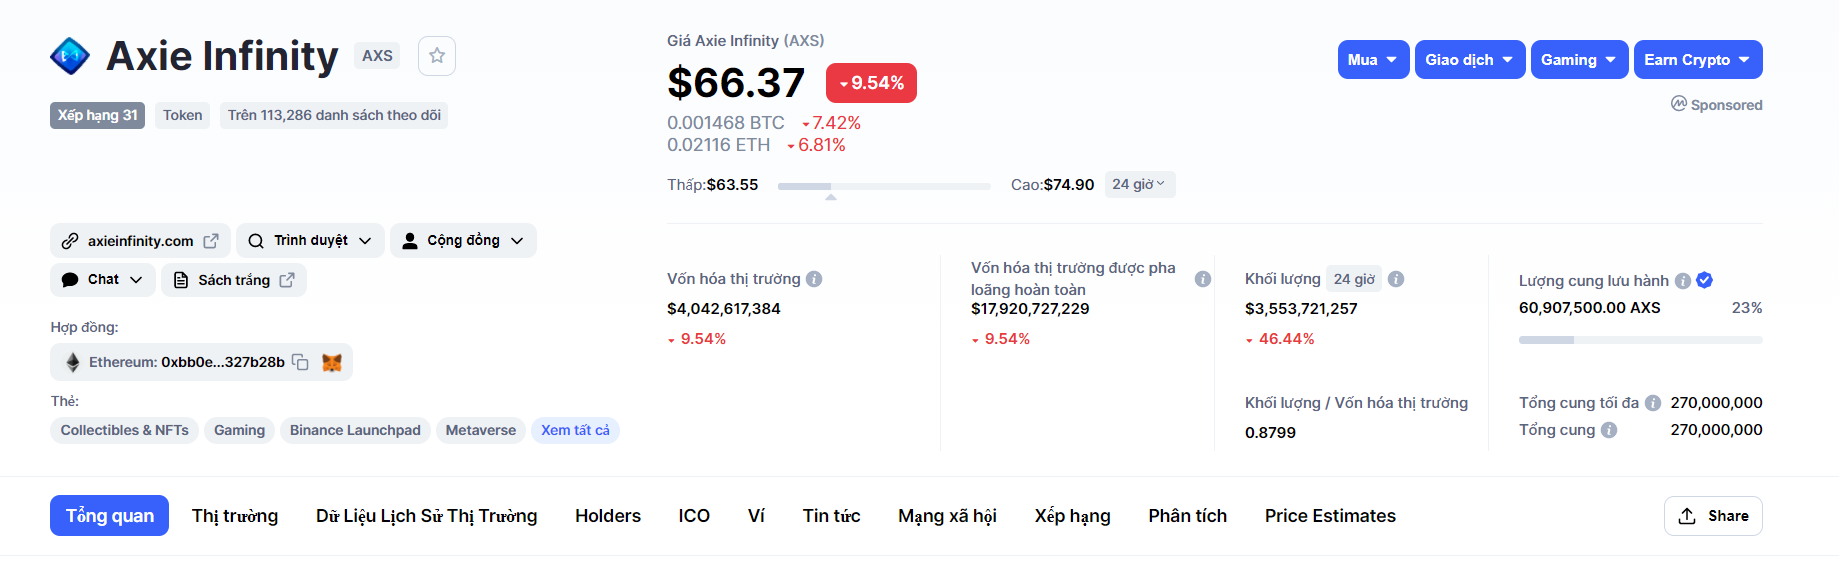

**Và công việc trong đây dưới đây là phân tích những item của tựa game Axie Infinity này được bán trên nền tảng Opensea có gì đáng chú ý**

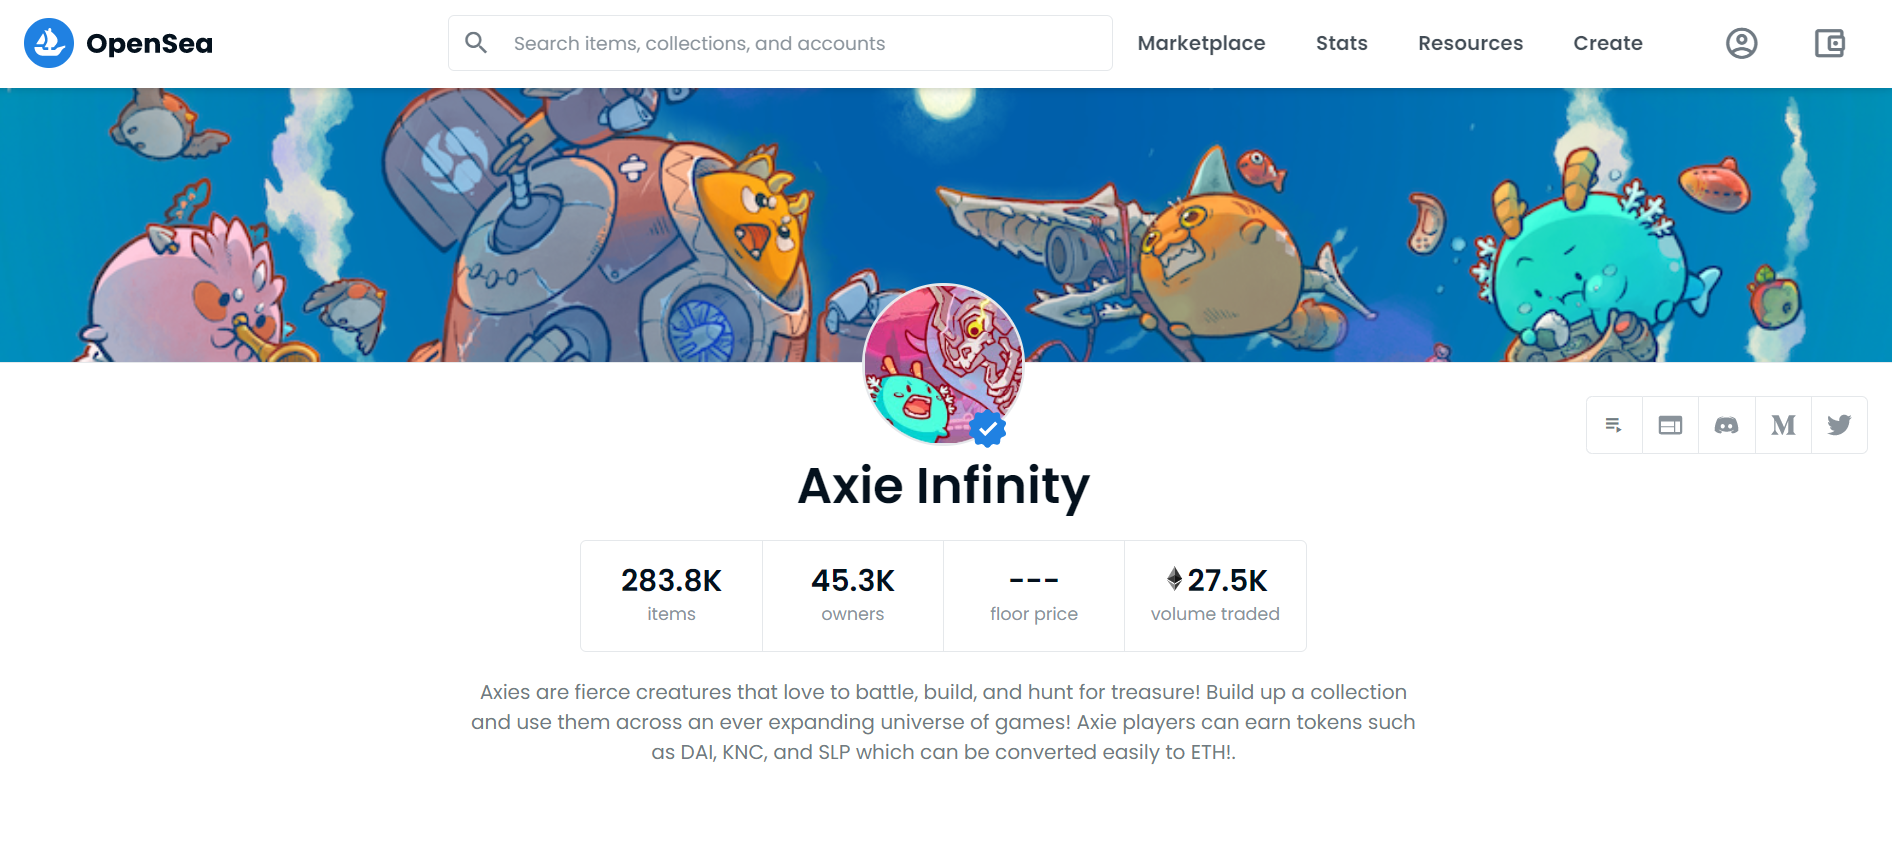

# 2. THU THẬP DỮ LIỆU

In [1]:
import requests
import pandas as pd
import numpy as np
import json
import torchvision
import torch
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl
from pytorch_lightning.metrics.functional import accuracy
from sklearn.preprocessing import OneHotEncoder

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import pymongo
from pymongo import MongoClient

from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import logging
import timm
import os
from sklearn import preprocessing

**Vì đã có data nên ko khuyến khích chạy code ở những cell bị khóa.**

In [2]:
%%script false --no-raise-error

def parse_data(AXS_dict):
    
    AXS_id = AXS_dict['token_id']
    
    try:
        creator_username = AXS_dict['creator']['user']['username']
    except:
        creator_username = None
    try:
        creator_address = AXS_dict['creator']['address']
    except:
        creator_address = None
    
    try:
        owner_username = AXS_dict['owner']['user']['username']
    except:
        owner_username = None
    
    owner_address = AXS_dict['owner']['address']
    
    traits = AXS_dict['traits']
    num_sales = int(AXS_dict['num_sales'])
    image_url = AXS_dict['image_original_url']
    description = AXS_dict['asset_contract']['description']
    item_name = AXS_dict['name']
    
    result = {'AXS id': AXS_id,
              'item name ' : item_name,
              'creator username': creator_username,
              'creator address': creator_address,
              'owner username': owner_username,
              'owner address': owner_address,
              'traits': traits,
              'number sales': num_sales,
              'avatar':image_url,
              'description' : description
             }
    
    return result


def parse_sale_data(sale_dict):
    
    is_bundle = False

    if sale_dict['asset'] != None:
        AXS_id = sale_dict['asset']['token_id']
    elif sale_dict['asset_bundle'] != None:
        AXS_id = [asset['token_id'] for asset in sale_dict['asset_bundle']['assets']]
        is_bundle = True
    
    
    seller_address = sale_dict['seller']['address']
    buyer_address = sale_dict['winner_account']['address']
    
    try:
        seller_username = sale_dict['seller']['user']['username']
    except:
        seller_username = None    
    try:
        buyer_username = sale_dict['winner_account']['user']['username']
    except:
        buyer_username = None
    
    timestamp = sale_dict['transaction']['timestamp']
    total_price = float(sale_dict['total_price'])
    payment_token = sale_dict['payment_token']['symbol']
    if sale_dict['payment_token']['usd_price'] is None:
        usd_price = '0'
    else:
        usd_price = float(sale_dict['payment_token']['usd_price'])
        
    transaction_hash = sale_dict['transaction']['transaction_hash']
    

    result = {'is_bundle': is_bundle,
              'AXS_id': AXS_id,
              'seller_address': seller_address,
              'buyer_address': buyer_address,
              'buyer_username': buyer_username,
              'seller_username':seller_username,
              'timestamp': timestamp,
              'total_price': total_price, 
              'payment_token': payment_token,
              'usd_price': usd_price,
              'transaction_hash': transaction_hash}
    
    return result

Couldn't find program: 'false'


kết nối với mongdb vì bộ data quá lớn để chúng ta chỉ cần crawl data 1 lần duy nhất và có thể tiếp tục crawl sau nếu như disconnect hoặc bị lỗi.

In [3]:
%%script false --no-raise-error

client = MongoClient()
db = client.AxieInfinityDB
AxieInfinity_collection = db.AxieInfinityCollection
sales_collection = db.AxieInfinitysales

Couldn't find program: 'false'


**Sử dụng API để lấy toàn bộ những NFT item của Axie trên Opensea. Tổng cộng có 283817 item những mỗi lần ta chỉ lấy được 50 ( limit = 50) thế nên ta sẽ chạy vòng lặp 5677 lần.**

In [4]:
%%script false --no-raise-error

url = "https://api.opensea.io/api/v1/assets"
##1174 1175
for i in range( 0 , 5677):
    querystring = {"token_ids":list(range((i*50)+1, (i*50)+51)),
                   "asset_contract_address":"0xF5b0A3eFB8e8E4c201e2A935F110eAaF3FFEcb8d",
                   "order_direction":"desc",
                   "offset":"0",
                   "limit":"50"}
    response = requests.request("GET", url, params=querystring)
    
    print(i, end=" ")
    if response.status_code != 200:
        print('error')
        
    AXSs = response.json()['assets']
    parsed_AXSs = [parse_data(AXS) for AXS in AXSs]
    AxieInfinity_collection.insert_many(parsed_AXSs)

Couldn't find program: 'false'


In [5]:
%%script false --no-raise-error

url = "https://api.opensea.io/api/v1/assets"

querystring = {"asset_contract_address":"0xF5b0A3eFB8e8E4c201e2A935F110eAaF3FFEcb8d","order_direction":"desc","offset":"0","limit":"20"}

response = requests.request("GET", url, params=querystring)
0xf5b0a3efb8e8e4c201e2a935f110eaaf3ffecb8d

Couldn't find program: 'false'


**Sử dụng API để lấy toàn bộ những event của NFT item của Axie trên Opensea. Vì không viết số lượng bao nhiêu nên ta sẽ chạy lần lượt đến khi nào hết thì thôi.**

In [6]:
%%script false --no-raise-error

url = "https://api.opensea.io/api/v1/events"

for i in range(0, 1000):

    querystring = {"asset_contract_address":"0xf5b0a3efb8e8e4c201e2a935f110eaaf3ffecb8d",
                   "event_type":"successful",
                   "only_opensea":"true",
                   "offset":i*50,
                   "limit":"50"}

    headers = {"Accept": "application/json"}

    response = requests.request("GET", url, headers=headers, params=querystring)

    
    print(i, end=" ")
    if response.status_code != 200:
        print('error')
        break
    
    Axie_sales = response.json()['asset_events']

    if Axie_sales == []:
        break
    
    parsed_Axie_sales = [parse_sale_data(sale) for sale in Axie_sales]
    sales_collection.insert_many(parsed_Axie_sales)

Couldn't find program: 'false'


Tại thời điểm này chúng ta có tổng cộng 3201 event ( theo dữ liệu của mongoDB) trên opensea của Axie item.

Sau khi đã thu thập dữ liệu vào trong mongoDB, ta sẽ xuất ra dạng .CSV để đọc vào dataframe của pandas

In [7]:
AxieInfinity_collection = "D:/AxieInfinityCollection.csv"
AxieInfinity_sale =  "D:/AxieInfinitysales.csv"

# 3. KHÁM PHÁ DỮ LIỆU

## 3.1 Xử lý dữ liệu

In [8]:

Axie_df = pd.read_csv(AxieInfinity_collection)

Axie_sales_df = pd.read_csv(AxieInfinity_sale)

Loại bỏ cột id được sinh ra từ mongoDB

In [9]:
Axie_df = Axie_df.drop(['_id'],axis = 1)
Axie_sales_df = Axie_sales_df.drop(['_id'],axis = 1)

Trong quá trình crawl, có thể bị trùng dữ liệu nên ta sẽ loại bỏ dữ liệu trùng theo cột AXS id. Ngoài ra, ta không cần loại bỏ giá trị null vì giá trị null có nghĩa là không có lịch sử.

In [10]:
Axie_df = Axie_df.sort_values('AXS id').drop_duplicates(subset='AXS id')

In [11]:
Axie_df

,AXS id,avatar,creator address,creator username,description,item name,number sales,owner address,owner username,traits
2,1,https://lh3.googleusercontent.com/wCCR8DIoGiwP...,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,Axies are fierce creatures that love to battle...,Axie #1,0,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,"[{""trait_type"":""exp"",""value"":0,""display_type"":..."
3,2,https://lh3.googleusercontent.com/wCCR8DIoGiwP...,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,Axies are fierce creatures that love to battle...,Axie #2,0,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,"[{""trait_type"":""breed_count"",""value"":0,""displa..."
1,3,https://lh3.googleusercontent.com/wCCR8DIoGiwP...,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,Axies are fierce creatures that love to battle...,Axie #3,0,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,"[{""trait_type"":""breed_count"",""value"":0,""displa..."
0,4,https://lh3.googleusercontent.com/wCCR8DIoGiwP...,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,Axies are fierce creatures that love to battle...,Axie #4,0,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,"[{""trait_type"":""exp"",""value"":0,""display_type"":..."
41,5,https://lh3.googleusercontent.com/rlT16witsrqG...,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,Axies are fierce creatures that love to battle...,🏆 #5,0,0xf4985070ce32b6b1994329df787d1acc9a2dd9e2,NaN,"[{""trait_type"":""title"",""value"":""Origin"",""displ..."
...,...,...,...,...,...,...,...,...,...,...
283654,283779,https://lh3.googleusercontent.com/wCCR8DIoGiwP...,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,Axies are fierce creatures that love to battle...,Axie #283779,0,0xf371fcf44aeace19fc98f88f1f3d4dd9284f2093,NaN,"[{""trait_type"":""breed_count"",""value"":0,""displa..."
388136,283780,https://lh3.googleusercontent.com/wCCR8DIoGiwP...,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,Axies are fierce creatures that love to battle...,KKK,0,0xeb6184a3b715d495f849f2ac1e5316a7c9fb9f70,NaN,"[{""trait_type"":""breed_count"",""value"":0,""displa..."
388134,283781,https://lh3.googleusercontent.com/wCCR8DIoGiwP...,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,Axies are fierce creatures that love to battle...,Axie #283781,0,0xeb6184a3b715d495f849f2ac1e5316a7c9fb9f70,NaN,"[{""trait_type"":""breed_count"",""value"":0,""displa..."
388135,283782,https://lh3.googleusercontent.com/wCCR8DIoGiwP...,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,Axies are fierce creatures that love to battle...,P Aqua Male MAIN,0,0xeb6184a3b715d495f849f2ac1e5316a7c9fb9f70,NaN,"[{""trait_type"":""breed_count"",""value"":0,""displa..."


Theo như thấy thì ta có 283683 hàng, chứng tỏ đã lấy được gần hết các item trong bộ sưu tập Axie Infinity. Còn 134 item có thể vì lý do nào đó không lấy được. Tỷ lệ item không lấy được chiếm rất nhỏ ( 0.047 %) nên chúng ta có thể bỏ qua.

**Thông tin về các cột**

* AXS id : số id của vật phẩm nft của Axie trên mạng ethereum
* avatar : link ảnh đại điện của vật phẩm nft
* creator address : địa chỉ ví của nhà sáng tạo
* description : mô tả cho vật phẩm
* item name : tên của vật phẩm 
* number sales :số giao dịch đã được hoàn thành trước đây của vật phẩm
* owner address : địa chỉ ví của người sở hữu hiện tại vật phẩm
* owner username : tên trên opensea của người sở hữu
* traits : mảng chứa các hệ của vật phẩm.          

In [12]:
Axie_df.dtypes

AXS id               int64
avatar              object
creator address     object
creator username    object
description         object
item name           object
number sales         int64
owner address       object
owner username      object
traits              object
dtype: object

In [13]:
Axie_sales_df

,AXS_id,buyer_address,buyer_username,is_bundle,payment_token,seller_address,seller_username,timestamp,total_price,transaction_hash,usd_price
0,38411,0xb34cb984a0d96174cbf3b42c7ea2da20025308be,NaN,False,WETH,0xc07f2785adfdd4ffe9288a1ab77ed5e147ade0bf,cyberpip,2021-04-28T09:07:31,30000000000000000,0xd3e28d4126fe90ac2bfda71fb1ed7df05917e37dd7e0...,3230.840000
1,89060,0xb34cb984a0d96174cbf3b42c7ea2da20025308be,NaN,False,WETH,0xc07f2785adfdd4ffe9288a1ab77ed5e147ade0bf,cyberpip,2021-04-28T09:05:24,30000000000000000,0x1af1f3224229a288353ff2cf7882920c56d63bbed365...,3230.840000
2,"[""149535"",""235762"",""258009""]",0x9700b0280f6e36f71271fd4555a50a782cc81402,dipshit,True,ETH,0x74c8ad15775f46adbcd7a5411043db37ad959498,valkrymmenos,2021-04-28T04:52:41,0,0x0b4ff8933611ca8b363469e838d1b818dd7762c51ca8...,3230.340000
3,4391,0xa4e7918fb5f4a8c12f9513b193be1d764d5757dc,just_homes,False,USDC,0x44ecbf70c90b5dfd8c60daba42e92c4bea668bae,r4di4,2021-04-28T02:17:40,1250000000,0x1fd6578adbdf79e52df5648aa637f65165f204531987...,0.996649
4,4390,0xa4e7918fb5f4a8c12f9513b193be1d764d5757dc,just_homes,False,USDC,0x44ecbf70c90b5dfd8c60daba42e92c4bea668bae,r4di4,2021-04-28T02:12:47,1250000000,0x14b22ed2325e33fbffb2f529e87a4dfb51633f59188d...,0.996649
...,...,...,...,...,...,...,...,...,...,...,...
3196,"[""5356"",""3765"",""4077"",""4013"",""5317"",""4688"",""36...",0x23db25c468507cdc30da36c150cf34958fc51194,ziddy,True,ETH,0x6d295267ce505c55ad65f1759c080be337f96943,NaN,2018-10-18T11:20:30,2050000000000000000,0xb9022a8f06d071e6a3ca070a09428b9ff1525e5de1cf...,3230.340000
3197,4481,0x1cde1ceb01081a9c313671a4e463055e54bd85e4,Alonnso,False,ETH,0x72481ed49d91ea3f17ff08a3790a2a3f530b5778,bobbybobson,2018-09-20T20:44:23,70000000000000000,0x9de791d8072f2e40e68228a248e0fcabcdab5ae378d9...,3230.340000
3198,4301,0x2643796cb6b4e715140f09c352ea26afff1a7d93,LucidApe,False,ETH,0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8,wanderer2,2018-09-10T17:26:52,60000000000000000,0x205868e28f04ad575b92f9d7dbfc7589e403986fd9fd...,3230.340000
3199,4481,0x72481ed49d91ea3f17ff08a3790a2a3f530b5778,bobbybobson,False,ETH,0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8,wanderer2,2018-09-08T20:21:32,68000000000000000,0x4138dc302ee92a7ef72fe92f9f9e9221c403488b8677...,3230.340000


**Thông tin về cột**

* AXS_id              : số id của vật phẩm nft của Axie trên mạng ethereum
* buyer_address       : địa chỉ ví người mua
* buyer_username      : tên người mua trên opensea
* is_bundle           : có phải bán theo bộ hay không
* payment_token       : Tiền tệ thanh toán
* seller_address      : địa chỉ ví người bán
* seller_username     : tên người bán trên opensea
* timestamp           : Thời gian giao dịch
* total_price         : Giá 
* transaction_hash    : mã giao dịch trên mạng ethereum
* usd_price           : Giá theo USD

In [14]:
Axie_sales_df.dtypes

AXS_id               object
buyer_address        object
buyer_username       object
is_bundle              bool
payment_token        object
seller_address       object
seller_username      object
timestamp            object
total_price          object
transaction_hash     object
usd_price           float64
dtype: object

## 3.2 Phân tích dữ liệu

**Ta sẽ tìm hiểu xem ai là người tạo ra các tác phẩm này. Bây giờ chúng ta sẽ lấy ra 10 nhà sáng tạo cho ra nhiều item nhất.**

In [15]:
creators = []
for creator_address in Axie_df['creator address'].value_counts().index[:10]:
    creator_data = {}
    creator_data['creator address'] = creator_address
    creator_data['creator username'] = Axie_df[Axie_df['creator address'] == creator_address]['creator username'].iloc[0]
    creator_data['number Axie'] = len(Axie_df[Axie_df['creator address'] == creator_address])
    creators.append(creator_data)

pd.DataFrame(creators)

,creator address,creator username,number Axie
0,0x01bf1d7c5e192313c26414e134584275f46271cf,0x01bf1d7c5e192313c26414e134584275f46271cf,283683


Như ở trên thì toàn bộ item đều được tạo ra từ 1 địa chỉ ví duy nhất (0x01bf1d7c5e192313c26414e134584275f46271cf) . Chứng tỏ toàn bộ các item đều được phát hành độc quyền từ Axie Infinity. Từ đó suy ra được là nhà phát hành muốn đảm bảo nguồn cung giới hạn cho bộ sưu tập này và độc quyền nó.

**Ta tìm hiểu xem các item này thường được mua bán riêng lẻ hay mua theo bộ** 

In [16]:
Axie_sales_df['is_bundle'].value_counts(normalize=True)*100

False    84.723524
True     15.276476
Name: is_bundle, dtype: float64

Theo như kết quả ở trên thì nhà đầu tư thường mua sản phẩm riêng lẻ hơn ( chiếm 84.72 % )

## Câu hỏi :  Loại tiền tệ nào thường được các nhà đầu tư thanh toán cho các vật phẩm ?

**Ta tìm hiểu các item mua riêng lẻ thường được thanh toán bằng các loại tiền tệ nào**

In [17]:
Axie_single_df = Axie_sales_df[Axie_sales_df['is_bundle'] == False]['payment_token']
Axie_single_df.value_counts()

ETH         2233
WETH         286
SLP          147
WHALE         22
USDC          11
DAPPT          7
DAI            2
WAXIE          1
SAI            1
CHERRY         1
OLDWAXIE       1
Name: payment_token, dtype: int64

Theo như kết quả ở trên thì các item thường được thanh toán bằng ethereum (ETH) và token swap của ethereum (WETH). Đây là điều dễ hiểu bởi vì token của Axie Infinity được tạo trên nên tảng ERC - 20 của ethereum.

In [18]:
Axie_bundle_df = Axie_sales_df[Axie_sales_df['is_bundle'] == True]['payment_token']
Axie_bundle_df.value_counts()

ETH     443
WETH     39
SLP       4
DAI       2
PGU       1
Name: payment_token, dtype: int64

Cũng giống như các item được bán riêng lẻ thì item bán theo bộ cũng thường được thanh toán bằng ETH và WETH.

**Thế nên ta sẽ tập trung phân tích các giao dịch được thanh toán bằng ETH và WETH vì đây là 2 token chính**

* Các item lẻ

In [19]:
# Parsing dates
Axie_single_df = Axie_sales_df[Axie_sales_df['is_bundle'] == False].copy()
Axie_single_df['timestamp'] = pd.to_datetime(Axie_single_df['timestamp'])
# Converting sales price from WEI to ETH
Axie_single_df['total_price'] = Axie_single_df['total_price'].astype(float)
Axie_single_df['total_price'] = Axie_single_df['total_price']/10.**18
# Calculating the sale prices in USD
Axie_single_df['total_price_usd'] = Axie_single_df['total_price'] * Axie_single_df['usd_price']

* Các item bộ

In [20]:
Axie_bundle_df = Axie_sales_df[Axie_sales_df['is_bundle'] == True].copy()
Axie_bundle_df['timestamp'] = pd.to_datetime(Axie_bundle_df['timestamp'])
# Converting sales price from WEI to ETH
Axie_bundle_df['total_price'] = Axie_bundle_df['total_price'].astype(float)
Axie_bundle_df['total_price'] = Axie_bundle_df['total_price']/10.**18
# Calculating the sale prices in USD
Axie_bundle_df['total_price_usd'] = Axie_bundle_df['total_price'] * Axie_bundle_df['usd_price']

In [21]:
Axie_single_df

,AXS_id,buyer_address,buyer_username,is_bundle,payment_token,seller_address,seller_username,timestamp,total_price,transaction_hash,usd_price,total_price_usd
0,38411,0xb34cb984a0d96174cbf3b42c7ea2da20025308be,NaN,False,WETH,0xc07f2785adfdd4ffe9288a1ab77ed5e147ade0bf,cyberpip,2021-04-28 09:07:31,3.000000e-02,0xd3e28d4126fe90ac2bfda71fb1ed7df05917e37dd7e0...,3230.840000,9.692520e+01
1,89060,0xb34cb984a0d96174cbf3b42c7ea2da20025308be,NaN,False,WETH,0xc07f2785adfdd4ffe9288a1ab77ed5e147ade0bf,cyberpip,2021-04-28 09:05:24,3.000000e-02,0x1af1f3224229a288353ff2cf7882920c56d63bbed365...,3230.840000,9.692520e+01
3,4391,0xa4e7918fb5f4a8c12f9513b193be1d764d5757dc,just_homes,False,USDC,0x44ecbf70c90b5dfd8c60daba42e92c4bea668bae,r4di4,2021-04-28 02:17:40,1.250000e-09,0x1fd6578adbdf79e52df5648aa637f65165f204531987...,0.996649,1.245811e-09
4,4390,0xa4e7918fb5f4a8c12f9513b193be1d764d5757dc,just_homes,False,USDC,0x44ecbf70c90b5dfd8c60daba42e92c4bea668bae,r4di4,2021-04-28 02:12:47,1.250000e-09,0x14b22ed2325e33fbffb2f529e87a4dfb51633f59188d...,0.996649,1.245811e-09
7,4047,0xa592aab591bb5ee06fa062907f76d41064b99241,RoundAnathema,False,WETH,0x7b8eb08a50237093dcad9651fcd6bc5eba32887e,Kotek,2021-04-27 09:40:39,2.500000e-02,0xa98470f3d971d4f02678bfe8617355cf5eab857b4b27...,3230.840000,8.077100e+01
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,125,0x5840feaaa7d7657c1a2f4c724928ddac62a743b3,小姐姐,False,ETH,0xa6bcec585f12cefba9709a080ce2efd38f871024,jihoz,2018-10-27 04:54:27,5.000000e-01,0x411743fb7090c69828308ce3c7d2346cf85128d313cd...,3230.340000,1.615170e+03
3197,4481,0x1cde1ceb01081a9c313671a4e463055e54bd85e4,Alonnso,False,ETH,0x72481ed49d91ea3f17ff08a3790a2a3f530b5778,bobbybobson,2018-09-20 20:44:23,7.000000e-02,0x9de791d8072f2e40e68228a248e0fcabcdab5ae378d9...,3230.340000,2.261238e+02
3198,4301,0x2643796cb6b4e715140f09c352ea26afff1a7d93,LucidApe,False,ETH,0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8,wanderer2,2018-09-10 17:26:52,6.000000e-02,0x205868e28f04ad575b92f9d7dbfc7589e403986fd9fd...,3230.340000,1.938204e+02
3199,4481,0x72481ed49d91ea3f17ff08a3790a2a3f530b5778,bobbybobson,False,ETH,0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8,wanderer2,2018-09-08 20:21:32,6.800000e-02,0x4138dc302ee92a7ef72fe92f9f9e9221c403488b8677...,3230.340000,2.196631e+02


## Câu hỏi:  số lượng giao dịch của vật phẩm Axie có trên opensea có tiềm năng không ?

**Tổng số lượng giao dịch theo ngày**

* Item lẻ

Text(0, 0.5, 'Number of Axie item Sales')

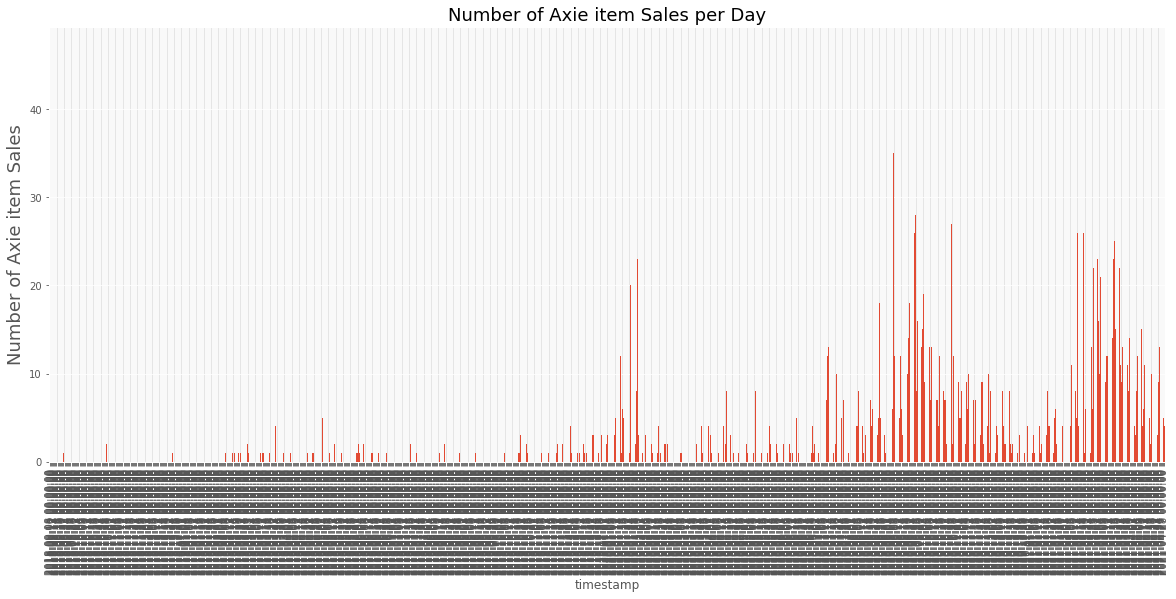

In [22]:
data = Axie_single_df[['timestamp', 'total_price']].resample('D', on='timestamp').count()['total_price']
ax = data.plot.bar(figsize=(20, 8))

ax.set_alpha(0.8)
ax.set_title("Number of Axie item Sales per Day", fontsize=18)
ax.set_ylabel("Number of Axie item Sales", fontsize=18)


* Item bộ

Text(0, 0.5, 'Number of Axie item Sales')

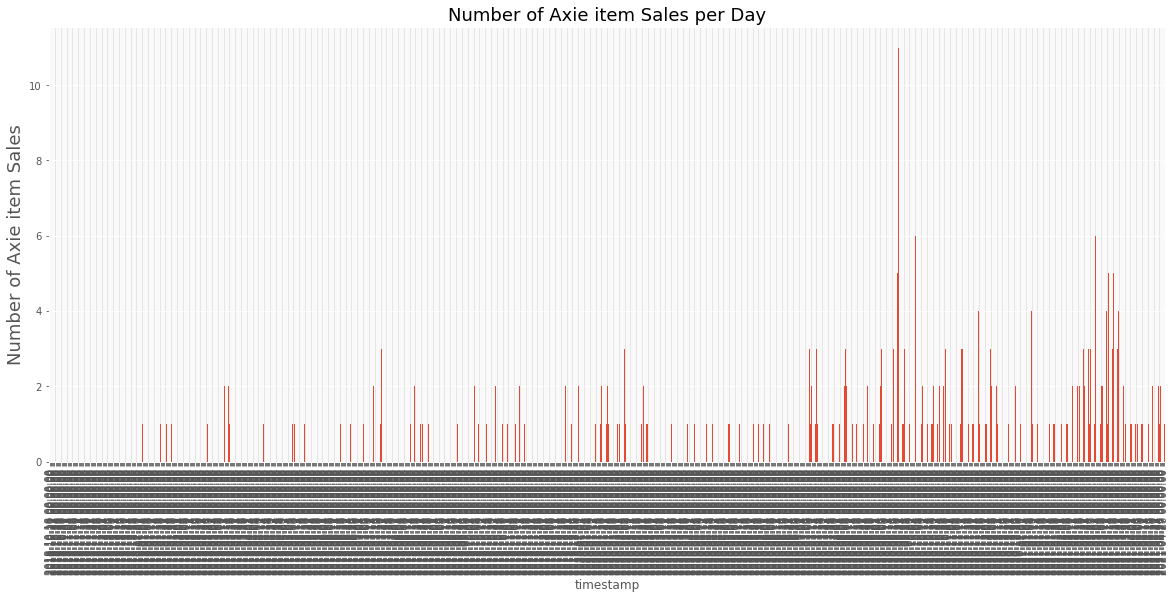

In [23]:
data = Axie_bundle_df[['timestamp', 'total_price']].resample('D', on='timestamp').count()['total_price']
ax = data.plot.bar(figsize=(20, 8))

ax.set_alpha(0.8)
ax.set_title("Number of Axie item Sales per Day", fontsize=18)
ax.set_ylabel("Number of Axie item Sales", fontsize=18)

Nhìn vào 2 biểu đồ trên đều có điểm chung là khối lượng giao dịch càng ngày càng lớn theo năm. Dựa vào đó ta có thể thấy độ thu hút của người dùng vào những item của Axie càng ngày tăng cao. Do đó thị trường mua bán, trao đổi Item sẽ có khả năng trở thành 1 thị trường tiềm năng để kinh doanh, có thể sẽ vượt xa thị trường mua bán vật chất thông thường trong tương lai.

## Câu hỏi : khối lượng giao dịch bằng ETH có ảnh hưởng gì đến sự giá trị của vật phẩm Axie ko ?

**Khối lượng giao dịch trong ngày theo ETH**

* Item lẻ

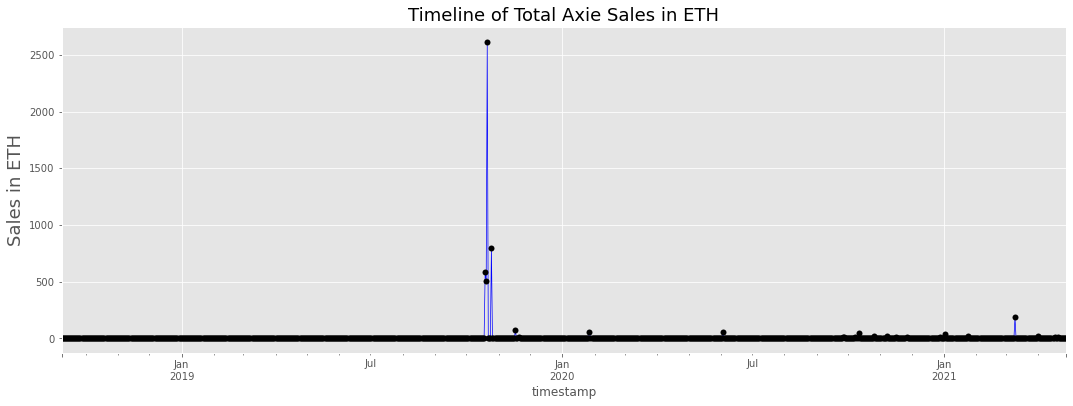

In [24]:
data = Axie_single_df[['timestamp', 'total_price']].resample('D', on='timestamp').sum()['total_price']
ax = data.plot(figsize=(18,6), color="blue", linewidth=0.7, marker='o', markerfacecolor='black', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Total Axie Sales in ETH", fontsize=18)
ax.set_ylabel("Sales in ETH", fontsize=18);

dates = list(data.index)
values = list(data.values)

* Item bộ

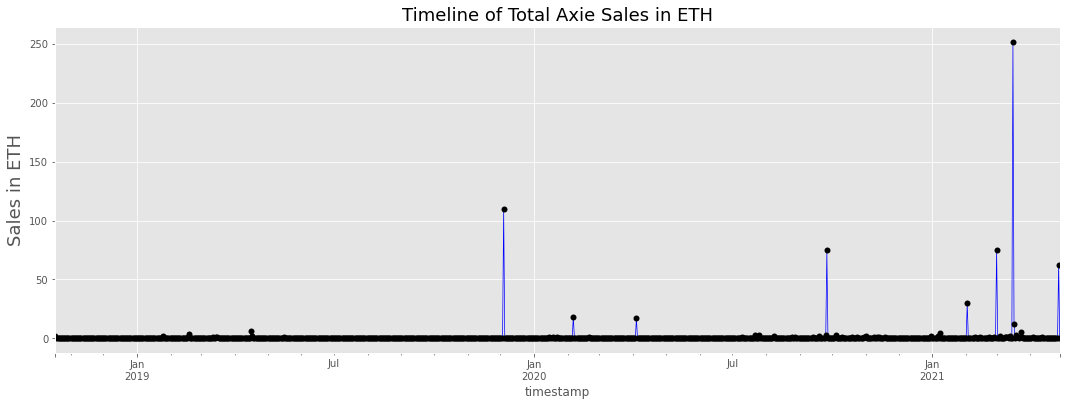

In [25]:
data = Axie_bundle_df[['timestamp', 'total_price']].resample('D', on='timestamp').sum()['total_price']
ax = data.plot(figsize=(18,6), color="blue", linewidth=0.7, marker='o', markerfacecolor='black', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Total Axie Sales in ETH", fontsize=18)
ax.set_ylabel("Sales in ETH", fontsize=18);

dates = list(data.index)
values = list(data.values)

**Khối lượng giao dịch trong ngày theo USD**

* Item lẻ

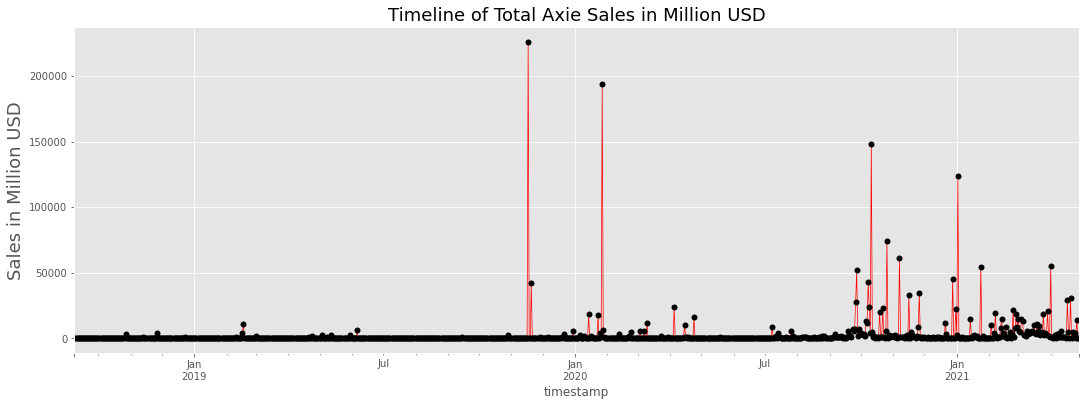

In [26]:
data = Axie_single_df[['timestamp', 'total_price_usd']].resample('D', on='timestamp').sum()['total_price_usd']
ax = data.plot(figsize=(18,6), color="red", linewidth=0.7, marker='o', markerfacecolor='black', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Total Axie Sales in Million USD", fontsize=18)
ax.set_ylabel("Sales in Million USD", fontsize=18);

* Item bộ

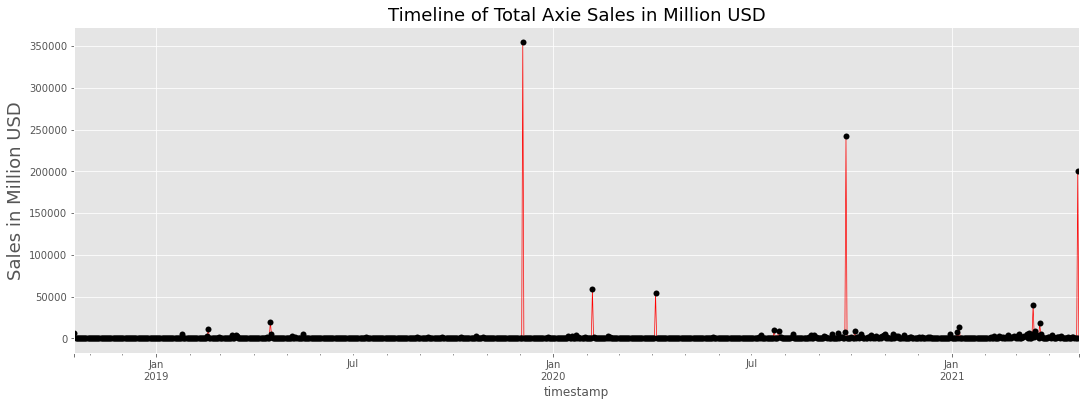

In [27]:
data = Axie_bundle_df[['timestamp', 'total_price_usd']].resample('D', on='timestamp').sum()['total_price_usd']
ax = data.plot(figsize=(18,6), color="red", linewidth=0.7, marker='o', markerfacecolor='black', markeredgewidth=0)

ax.set_alpha(0.8)
ax.set_title("Timeline of Total Axie Sales in Million USD", fontsize=18)
ax.set_ylabel("Sales in Million USD", fontsize=18);

Từ biểu đồ ta thấy khối lượng giao dịch theo ETH giảm dần mạnh nhưng khối lượng giao dịch theo USD lại thay đổi nhiều, điều này là do giá của ETH đã tăng mạnh trong thời gian vừa qua ( 1500% trong vào 1 năm). Do đó ta có thể nói rằng các item NFT của AXie thực sự có giá trị theo USD.

## Câu hỏi: liệu trên opensea các nhà đầu tư có quan tâm đến các vật phẩm Axie không ?

**Phân tích người mua và người bán**

* Người bán

In [28]:
sellers = []
for seller_address in Axie_sales_df['seller_address'].value_counts().index[:10]:
    seller_data = {}
    seller_data['seller_address'] = seller_address
    seller_data['seller_username'] = Axie_sales_df[Axie_sales_df['seller_address'] == seller_address]['seller_username'].iloc[0]
    seller_data['number_sales'] = len(Axie_sales_df[Axie_sales_df['seller_address'] == seller_address])
    seller_data['min_price'] = Axie_sales_df[Axie_sales_df['seller_address'] == seller_address]['total_price'].min()
    seller_data['max_price'] = Axie_sales_df[Axie_sales_df['seller_address'] == seller_address]['total_price'].max()
    seller_data['mean_price'] = Axie_sales_df[Axie_sales_df['seller_address'] == seller_address]['total_price'].mean()
    sellers.append(seller_data)

seller_df = pd.DataFrame(sellers)
seller_df

,seller_address,seller_username,number_sales,min_price,max_price,mean_price
0,0x42a60d2f2ffa2150c568010a8d425f0aad284fd2,esofu,137,100000000000000000,96776088688511250,inf
1,0x9e315e9701908501f6dc68a2af6e28a20c75d970,Jibberson,92,15000000000000000,80000000000000000,inf
2,0x91ea02976870d5a037a78c5ba3b8bc4f3d9e4da0,BiffChain_Axies-GUwallet,79,1050,950,inf
3,0xc95a7c56e8d399ea4bee9e2bb170be220adfbacd,Brookhawk,61,119000000000000000,90000000000000000,inf
4,0xe0e5b63f2f07d9f94e99854ce7c38c824a82a8bb,NaN,60,1300000000000000000,800000000000000000,inf
5,0xd1e6fc718660618d73d458a77bd0339f6c2f4212,MR-DAPP,60,10000000000000000,72500000000000000,inf
6,0x0ed70f92b87ceced51a9e472fcd8d93a54a11835,4000-axies_make-an-offer,38,100000000000000000,94000000000000000,inf
7,0xc5143358dcc5d0e524b9e3bc73e75310ace0e99d,ARTofLOVE_NotWar,37,15000000000000000,95000000000000000,inf
8,0x708c0f87e1b3163e5980a4ef1c8a2ef87c158083,kipere,37,10000000000000000,80000000000000000,inf
9,0x1c9cdf7e998266228a6e4929f5f721cf0f40a074,NaN,32,35000000000000000,70000000000000000,inf


* Người mua

In [29]:

buyers = []
for buyer_address in Axie_sales_df['buyer_address'].value_counts().index[:10]:
    buyer_data = {}
    buyer_data['buyer_address'] = buyer_address
    buyer_data['buyer_username'] = Axie_sales_df[Axie_sales_df['buyer_address'] == buyer_address]['buyer_username'].iloc[0]
    buyer_data['number_buys'] = len(Axie_sales_df[Axie_sales_df['buyer_address'] == buyer_address])
    buyer_data['min_price'] = Axie_sales_df[Axie_sales_df['buyer_address'] == buyer_address]['total_price'].min()
    buyer_data['max_price'] = Axie_sales_df[Axie_sales_df['buyer_address'] == buyer_address]['total_price'].max()
    buyer_data['mean_price'] = Axie_sales_df[Axie_sales_df['buyer_address'] == buyer_address]['total_price'].mean()
    buyers.append(buyer_data)
    
buyer_df = pd.DataFrame(buyers)
buyer_df

,buyer_address,buyer_username,number_buys,min_price,max_price,mean_price
0,0xd04c453461a77b342fea9d1fec55861399401122,OniOni,68,100000000000000000,95000000000000000,inf
1,0xa4e7918fb5f4a8c12f9513b193be1d764d5757dc,just_homes,42,100000000000000000,750000000000000000,inf
2,0x84957e6c9f6ccfed9c35c850c3903732ed90858a,ak,42,10000000000000000,94000000000000000,inf
3,0x3d0d7f8720a02cfc9fee5dc7dc08181303a6ed86,ricfish,33,1000000000000000000,700000000000000000,inf
4,0x26ebb22d5bd11ee0ff3f88a3634657b5a19d60f3,c_ganley,27,50000000000000000,85000000000000000,inf
5,0x6929034fa203cb93b9a0e6214a19c09648283643,dapps,25,20000000000000000,41000000000000000,inf
6,0xffb226bf609fc21fb187684945bb989ad43733a3,Random,24,10000000000000000,50000000000000000,2.083333e+126
7,0x62391b370a4761f7087f83d9d2c8d7bfa91036ab,WTFISTHIS,24,1300000000000000000,850000000000000000,inf
8,0xc88fe9bfce6294c0faa5eb3fbed02cdd6b59cd95,exit490,19,30000000000000000,40000000000000000,inf
9,0x0c78223c4f5a19480958a83f7769ec39592cb592,shimayan,16,120000000000000000,79000000000000000,3.883790e+271


In [30]:
print(f"{len(buyer_df['buyer_address'].unique())} buyers")
print(f"{len(seller_df['seller_address'].unique())} sellers")

10 buyers
10 sellers


Nhìn vào số lượng người mua và số lượng người bán, ta có thể thấy rằng trên nền tảng opensea chưa thực sự thịnh hành với những người chơi Axie Infinity. Đây có khả năng là vì trên Axie Infinity vốn đã có một marketplace sẵn để mọi người có thể giao dịch trực tiếp không cần thông qua bên thứ 3.

# 4. Model

**Vì các thuộc tính như địa chỉ ví, mã giao dịch, tên người mua bán là duy nhất. Nên ta sẽ bỏ qua những thuộc tính này mà tập trung vào thuộc tính của vật phẩm để dự đoán giá trị của vật phẩm**

Do API của Opensea không thể đào sâu hơn vào mạng dữ liệu trên ethereum của Axie Infinity để lấy ra những thuộc tính chi tiết của item (cột trait) nên vì thế nhóm em quyết crawl data thay thế từ marketplace của Axie Infinity để bổ sung. Và dữ liệu lấy sẽ là của item #Axie 1000000 đến #Axie 1050000.

In [31]:
%%script false --no-raise-error
client = MongoClient()
db = client.AxieInfinityDB
AxieInfinity = db.AxieInfinityMarketplace

Couldn't find program: 'false'


In [32]:
%%script false --no-raise-error

url = "https://api.axie.technology/getaxies/"
for i in range(1000000,1050000):
    url1 = url + str(i)
    print(url1)
    reqs = requests.get(url1)
    soup = BeautifulSoup(reqs.content, 'lxml')
    soup = str(soup).replace("<html><body><p>","")
    soup = str(soup).replace("</p></body></html>","")
    try:
        js = json.loads(soup)
        hp = js['stats']['hp']
        morale = js['stats']['morale']
        speed = js['stats']['speed']
        skill = js['stats']['skill']
        stage = js['stage']
        breedcount = js['breedCount']
        class_ = js['class']
        parts = js['parts']
        if js['auction'] == None:
            continue
        price_eth = float(js['auction']['startingPrice'])
        card_id = []
        for j in range(0,len(parts)):
             card_id.append({parts[j]["id"]:parts[j]["stage"]})
        bodyshape = js['bodyShape']
        level = js['level']
        res = {
            "hp" : hp,
            "morale" : morale,
            "speed" : speed,
            "skill" : skill,
            "stage" : stage,
            "breedcount" : breedcount,
            "class" : class_,
            "card_id" : card_id,
            "bodyshape " : bodyshape,
            "level" : level,
            "price_eth":price_eth
        }
        AxieInfinity.insert_one(res)
        print("succesfull")
    except:
        pass

Couldn't find program: 'false'


In [33]:
Axie_id_url = "D:\AxieInfinityMarketplace.csv"
AXS_id_df = pd.read_csv(Axie_id_url)

In [34]:
AXS_id_df

,bodyshape,breedcount,card_id,class,hp,level,morale,price_eth,skill,speed,stage
0,Normal,0,"[{""eyes-sleepless"":1},{""ears-bubblemaker"":1},{...",Aquatic,45,1,27,3.200000e+17,35,57,4
1,Normal,0,"[{""eyes-mavis"":1},{""ears-early-bird"":1},{""back...",Bird,27,1,41,2.000000e+17,35,61,4
2,Normal,5,"[{""eyes-papi"":1},{""ears-hollow"":1},{""back-wate...",Plant,61,1,41,2.500000e+17,31,31,4
3,Normal,0,"[{""eyes-papi"":1},{""ears-lotus"":1},{""back-pumpk...",Plant,61,1,41,4.900000e+17,31,31,4
4,Normal,0,"[{""eyes-scar"":1},{""ears-puppy"":1},{""back-ronin...",Beast,34,1,58,2.150000e+17,31,41,4
...,...,...,...,...,...,...,...,...,...,...,...
12600,WetDog,2,"[{""eyes-little-peas"":1},{""ears-curly"":1},{""bac...",Aquatic,43,1,34,2.000000e+17,35,52,4
12601,Fuzzy,3,"[{""eyes-telescope"":1},{""ears-gill"":1},{""back-g...",Aquatic,45,1,27,1.690000e+17,35,57,4
12602,Normal,2,"[{""eyes-confused"":1},{""ears-hollow"":1},{""back-...",Plant,55,1,41,2.000000e+17,31,37,4
12603,WetDog,2,"[{""eyes-little-owl"":1},{""ears-rosa"":1},{""back-...",Aquatic,47,1,30,2.000000e+17,35,52,4


## 4.1 Tiền xử lý dữ liệu

In [35]:
bodyshape = AXS_id_df['bodyshape '].unique()
bodyshape_map = {}
for i in range(len(bodyshape)):
    bodyshape_map[bodyshape[i]] = i
print(bodyshape_map)
AXS_id_df['bodyshape '] = AXS_id_df['bodyshape '].map(bodyshape_map)
AXS_id_df['bodyshape ']

{'Normal': 0, 'Curly': 1, 'Fuzzy': 2, 'Spiky': 3, 'Sumo': 4, 'WetDog': 5, 'BigYak': 6, nan: 7}


0        0
1        0
2        0
3        0
4        0
        ..
12600    5
12601    2
12602    0
12603    5
12604    0
Name: bodyshape , Length: 12605, dtype: int64

In [36]:
class_ = AXS_id_df['class'].unique()
class_map = {}
for i in range(len(class_)):
    class_map[class_[i]] = i
print(class_map)
AXS_id_df['class'] = AXS_id_df['class'].map(class_map)
AXS_id_df['class']

{'Aquatic': 0, 'Bird': 1, 'Plant': 2, 'Beast': 3, 'Reptile': 4, 'Dusk': 5, 'Dawn': 6, 'Mech': 7, 'Bug': 8, nan: 9}


0        0
1        1
2        2
3        2
4        3
        ..
12600    0
12601    0
12602    2
12603    0
12604    2
Name: class, Length: 12605, dtype: int64

In [37]:
AXS_id_df['card_id'] = AXS_id_df['card_id'].apply(json.loads)


In [38]:
def find_set(l):
    s = set()
    for i in range(len(l)):
        f = l[i].copy()
        s.add(f.popitem()[0])
    return s
copy = AXS_id_df['card_id'].apply(find_set)
ability_set = set({""})
setlist = copy.values
alls = set()
for i in range(len(setlist)):
    alls = alls.union(setlist[i])
alls = list(alls)

In [39]:
ability_map = {}
for i in range(len(alls)):
    ability_map[alls[i]] = i
ability_map

{'tail-gila': 0,
 'tail-ant': 1,
 'tail-post-fight': 2,
 'tail-carrot': 3,
 'back-red-ear': 4,
 'tail-shrimp': 5,
 'horn-merry': 6,
 'tail-thorny-caterpillar': 7,
 'back-cupid': 8,
 'ears-clover': 9,
 'horn-eggshell': 10,
 'back-kingfisher': 11,
 'ears-small-frill': 12,
 'back-scarab': 13,
 'back-tri-feather': 14,
 'mouth-hungry-bird': 15,
 'tail-ranchu': 16,
 'back-blue-moon': 17,
 'ears-zen': 18,
 'mouth-serious': 19,
 'horn-arco': 20,
 'ears-hollow': 21,
 'tail-koi': 22,
 'ears-ear-breathing': 23,
 'ears-nyan': 24,
 'ears-bubblemaker': 25,
 'back-turnip': 26,
 'back-buzz-buzz': 27,
 'back-watering-can': 28,
 'back-anemone': 29,
 'mouth-mosquito': 30,
 'horn-parasite': 31,
 'tail-pupae': 32,
 'tail-grass-snake': 33,
 'horn-incisor': 34,
 'back-raven': 35,
 'ears-tiny-fan': 36,
 'eyes-lucas': 37,
 'eyes-papi': 38,
 'eyes-gero': 39,
 'back-mint': 40,
 'back-perch': 41,
 'back-ronin': 42,
 'horn-wing-horn': 43,
 'mouth-zigzag': 44,
 'ears-pogona': 45,
 'back-bidens': 46,
 'horn-trump': 

In [40]:
def card_id_nom(l):
    empty = []
    key = 0
    val = 0
    for i in range(len(l)):
        for a,b  in l[i].items():
            key = ability_map[a]
            val = b
            empty.append(key)
            empty.append(val)
    return empty


In [41]:
AXS_id_df['card_id'] = AXS_id_df['card_id'].apply(card_id_nom)
AXS_id_df['card_id']

0          [131, 1, 25, 1, 119, 1, 120, 1, 156, 1, 5, 1]
1            [107, 1, 137, 1, 8, 1, 126, 1, 10, 1, 2, 1]
2            [38, 1, 21, 1, 28, 1, 19, 1, 60, 1, 142, 1]
3            [38, 1, 56, 1, 140, 1, 176, 1, 52, 1, 3, 1]
4         [188, 1, 110, 1, 42, 1, 146, 1, 104, 1, 59, 1]
                              ...                       
12600       [88, 1, 143, 1, 46, 1, 15, 1, 154, 1, 84, 1]
12601    [190, 1, 149, 1, 119, 1, 120, 1, 154, 1, 22, 1]
12602        [141, 1, 21, 1, 27, 1, 90, 1, 62, 1, 22, 1]
12603       [64, 1, 83, 1, 91, 1, 15, 1, 134, 1, 125, 1]
12604        [107, 1, 83, 1, 140, 1, 94, 1, 52, 1, 3, 1]
Name: card_id, Length: 12605, dtype: object

In [42]:
#AXS_id_df['price_eth'] = 
re = AXS_id_df['price_eth']
for i in range(len(re)):
    re[i] = re[i] / 1000000000000000000


<ipython-input-42-0dae5f98600d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re[i] = re[i] / 1000000000000000000


In [43]:
AXS_id_df['price_eth']

0        0.320
1        0.200
2        0.250
3        0.490
4        0.215
         ...  
12600    0.200
12601    0.169
12602    0.200
12603    0.200
12604    0.200
Name: price_eth, Length: 12605, dtype: float64

In [44]:
AXS_id_df.describe()


,bodyshape,breedcount,class,hp,level,morale,price_eth,skill,speed,stage
count,12605.000000,12605.000000,12605.000000,12605.000000,12605.0,12605.000000,12605.000000,12605.000000,12605.000000,12605.0
mean,0.542245,1.830464,2.054185,44.828798,1.0,42.746450,70.207222,32.571599,43.723046,4.0
std,1.250476,1.632557,1.709922,11.612825,0.0,10.670528,6991.651717,2.471748,10.164796,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.010500,0.000000,0.000000,4.0
25%,0.000000,0.000000,1.000000,32.000000,1.0,37.000000,0.140000,31.000000,34.000000,4.0
50%,0.000000,2.000000,2.000000,45.000000,1.0,41.000000,0.173000,31.000000,41.000000,4.0
75%,0.000000,3.000000,3.000000,57.000000,1.0,49.000000,0.245000,35.000000,55.000000,4.0
max,7.000000,7.000000,9.000000,61.000000,1.0,61.000000,778578.000000,43.000000,61.000000,4.0


**Ta thấy độ lệch chuẫn của stage và level = 0 nên ta sẽ loại bỏ 2 thuộc tính này.Và price_eth có độ lệch chuẩn cực kỳ cao nên ta sẽ loại bỏ ngoại lai.**

In [45]:
AXS_id_df = AXS_id_df.drop(columns=['stage','level'])
AXS_id_df

,bodyshape,breedcount,card_id,class,hp,morale,price_eth,skill,speed
0,0,0,"[131, 1, 25, 1, 119, 1, 120, 1, 156, 1, 5, 1]",0,45,27,0.320,35,57
1,0,0,"[107, 1, 137, 1, 8, 1, 126, 1, 10, 1, 2, 1]",1,27,41,0.200,35,61
2,0,5,"[38, 1, 21, 1, 28, 1, 19, 1, 60, 1, 142, 1]",2,61,41,0.250,31,31
3,0,0,"[38, 1, 56, 1, 140, 1, 176, 1, 52, 1, 3, 1]",2,61,41,0.490,31,31
4,0,0,"[188, 1, 110, 1, 42, 1, 146, 1, 104, 1, 59, 1]",3,34,58,0.215,31,41
...,...,...,...,...,...,...,...,...,...
12600,5,2,"[88, 1, 143, 1, 46, 1, 15, 1, 154, 1, 84, 1]",0,43,34,0.200,35,52
12601,2,3,"[190, 1, 149, 1, 119, 1, 120, 1, 154, 1, 22, 1]",0,45,27,0.169,35,57
12602,0,2,"[141, 1, 21, 1, 27, 1, 90, 1, 62, 1, 22, 1]",2,55,41,0.200,31,37
12603,5,2,"[64, 1, 83, 1, 91, 1, 15, 1, 134, 1, 125, 1]",0,47,30,0.200,35,52


In [46]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

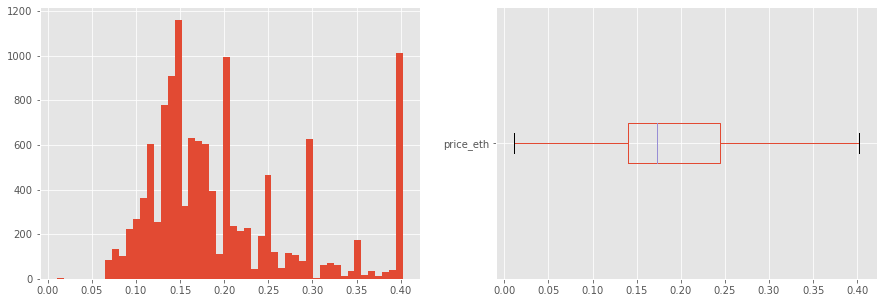

In [47]:
clipped_price = BoxplotOutlierClipper().fit_transform(AXS_id_df["price_eth"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_price.hist(bins=50, ax=axes[0])
clipped_price.to_frame().boxplot(ax=axes[1], vert=False);

Vậy là từ đây ta có thể thấy cách tốt nhất để xử lý ngoại lai cho thuộc tính price_eth là chỉ lấy giá trị < 0.4

In [48]:
chosen_df = AXS_id_df[AXS_id_df['price_eth'] <= 0.4]
chosen_df

,bodyshape,breedcount,card_id,class,hp,morale,price_eth,skill,speed
0,0,0,"[131, 1, 25, 1, 119, 1, 120, 1, 156, 1, 5, 1]",0,45,27,0.320,35,57
1,0,0,"[107, 1, 137, 1, 8, 1, 126, 1, 10, 1, 2, 1]",1,27,41,0.200,35,61
2,0,5,"[38, 1, 21, 1, 28, 1, 19, 1, 60, 1, 142, 1]",2,61,41,0.250,31,31
4,0,0,"[188, 1, 110, 1, 42, 1, 146, 1, 104, 1, 59, 1]",3,34,58,0.215,31,41
5,0,3,"[38, 1, 56, 1, 140, 1, 76, 1, 101, 1, 3, 1]",2,58,43,0.145,31,32
...,...,...,...,...,...,...,...,...,...
12600,5,2,"[88, 1, 143, 1, 46, 1, 15, 1, 154, 1, 84, 1]",0,43,34,0.200,35,52
12601,2,3,"[190, 1, 149, 1, 119, 1, 120, 1, 154, 1, 22, 1]",0,45,27,0.169,35,57
12602,0,2,"[141, 1, 21, 1, 27, 1, 90, 1, 62, 1, 22, 1]",2,55,41,0.200,31,37
12603,5,2,"[64, 1, 83, 1, 91, 1, 15, 1, 134, 1, 125, 1]",0,47,30,0.200,35,52


### Sau khi đã chuẩn hóa dữ liệu xong ta bắt đầu chia tập train , validation, test.

Tập train sẽ lấy 80% dữ liệu, 2 tập còn lại sẽ là 10% mỗi tập

In [49]:
train_data = chosen_df.sample(frac=0.8)
drop_data = chosen_df.drop(train_data.index)

val_data = drop_data.sample(frac=0.5)
test_data = drop_data.drop(val_data.index)


### Khởi tạo mô hình

In [50]:
class Regression(pl.LightningModule):
    def __init__(self,data_train,data_test,data_val):
        super(Regression, self).__init__()
        self.data_train = data_train
        self.data_test = data_test
        self.data_val = data_val
        self.hid1 = torch.nn.Linear(176, 70)
        self.hid2 = torch.nn.Linear(70, 40)
        self.hid3 = torch.nn.Linear(40, 20)
        self.hid4 = torch.nn.Linear(20, 10)
        self.oupt = torch.nn.Linear(10, 1)
        self.loss = torch.nn.MSELoss()
        
    def forward(self, x):
        z = self.hid1(x)
        z = self.hid2(z)
        z = self.hid3(z)
        z = self.hid4(z)
        z = self.oupt(z)
        return z

    
    def prepare(self,d):
        t = d.copy()
        target = t.pop('price_eth')
        card_id = t.pop('card_id')
        features = card_id.apply(pd.Series)
        features = features.drop(columns=[1,3,5,7,9,11])
        features = pd.get_dummies(features,columns = [2,4,6,8,10])
        f = pd.concat([t, features], axis=1)
        scaler = preprocessing.StandardScaler()
        f_scaled = scaler.fit_transform(f.values)
        f = pd.DataFrame(f_scaled)
        check = f[f.isna().any(axis=1)].index.to_list()
        f = f.drop(f.index[check])
        features = torch.tensor(f.values).float()
        target = torch.tensor(target.drop(target.index[check]).values).float()
        tensor = torch.utils.data.TensorDataset(features , target)
        return tensor
    def train_dataloader(self):
        train_dataset = self.prepare(self.data_train)
        train_loader = DataLoader(dataset = train_dataset, batch_size = 25,drop_last=True)
        return train_loader
        
    def val_dataloader(self):
        validation_dataset = self.prepare(self.data_val)
        validation_loader = DataLoader(dataset = validation_dataset,batch_size = 25,drop_last=True)
        return validation_loader
    
    def test_dataloader(self):
        test_dataset = self.prepare(self.data_test)
        test_loader = DataLoader(dataset = test_dataset, batch_size = 1)
        return test_loader

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.00446)
        return optimizer 

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        logits = torch.reshape(logits,(25,))
        loss = self.loss(logits, y)
        logs = {'loss': loss}
        return {'loss': loss, 'log': logs}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        logits = torch.reshape(logits,(25,))
        loss = self.loss(logits, y)
        return {'val_loss': loss}

    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        tensorboard_logs = {'val_loss': avg_loss}
        return {'avg_val_loss': avg_loss, 'log': tensorboard_logs}

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        logits = torch.reshape(logits,(1,))
        loss = self.loss(logits, y)
        acc = torch.sum(logits == y.data)

        predictions_pred.append(logits)
        predictions_actual.append(y.data)
        return {'test_loss': loss, 'test_correct': acc, 'logits': logits}
    
    def test_epoch_end(self, outputs):
        avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
        logs = {'test_loss': avg_loss}      
        return {'avg_test_loss': avg_loss, 'log': logs, 'progress_bar': logs }

In [51]:
predictions_pred = []
predictions_actual = []
model = Regression(train_data,test_data,val_data)
trainer = pl.Trainer(gpus = [0], max_epochs = 20,gradient_clip_val=0.01,track_grad_norm = 2, accelerator='dp')
                                    
#trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [52]:
trainer.fit(model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type    | Params
---------------------------------
0 | hid1 | Linear  | 12.4 K
1 | hid2 | Linear  | 2.8 K 
2 | hid3 | Linear  | 820   
3 | hid4 | Linear  | 210   
4 | oupt | Linear  | 11    
5 | loss | MSELoss | 0     
---------------------------------
16.3 K    Trainable params
0         Non-trainable params
16.3 K    Total params
0.065     Total estimated model params size (MB)


C:\ProgramData\Anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\ProgramData\Anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


C:\ProgramData\Anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\result.py:405: LightningDeprecationWarning: One of the returned values {'log'} has a `grad_fn`. We will detach it automatically but this behaviour will change in v1.6. Please detach it manually: `return {'loss': ..., 'something': something.detach()}`
  warning_cache.deprecation(


In [53]:
trainer.validate(model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------


[{}]

**Các trọng số của model**

In [54]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name) 
        print(param.data)

hid1.weight
tensor([[-0.0420,  0.0554, -0.0534,  ...,  0.0316, -0.0245,  0.0398],
        [ 0.0672,  0.0195, -0.0265,  ..., -0.0516,  0.0442,  0.0601],
        [-0.0536, -0.0612, -0.0339,  ..., -0.0148,  0.0204, -0.0580],
        ...,
        [-0.0451,  0.0460, -0.0254,  ...,  0.0251,  0.0374,  0.0731],
        [-0.0216,  0.0255, -0.0075,  ...,  0.0503, -0.0435,  0.0229],
        [-0.0374, -0.0013, -0.0664,  ...,  0.0152, -0.0319, -0.0600]])
hid1.bias
tensor([ 0.0508, -0.0370,  0.0563,  0.0240, -0.0335, -0.0342, -0.0127, -0.0374,
         0.0382,  0.0402, -0.0717, -0.0292,  0.0668, -0.0191,  0.0027,  0.0665,
         0.0291,  0.0724,  0.0113, -0.0253,  0.0310,  0.0077, -0.0638, -0.0619,
        -0.0049, -0.0119, -0.0138, -0.0173, -0.0390, -0.0436,  0.0462,  0.0522,
         0.0492, -0.0198, -0.0447,  0.0432,  0.0436, -0.0275, -0.0493,  0.0306,
        -0.0486,  0.0108,  0.0235, -0.0301, -0.0207,  0.0564, -0.0587, -0.0460,
        -0.0590, -0.0033,  0.0409,  0.0141,  0.0129,  0.0061,  0

In [55]:
trainer.test(model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\ProgramData\Anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------



[{}]

In [56]:
for i in range(len(predictions_pred)):
    predictions_pred[i] = predictions_pred[i].cpu().numpy()
    predictions_actual[i] = predictions_actual[i].cpu().numpy()

In [57]:
y1 = []
y2 = []
for i in range(len(predictions_actual)):
    y1.append(predictions_pred[i].item(0))
    y2.append(predictions_actual[i].item(0))

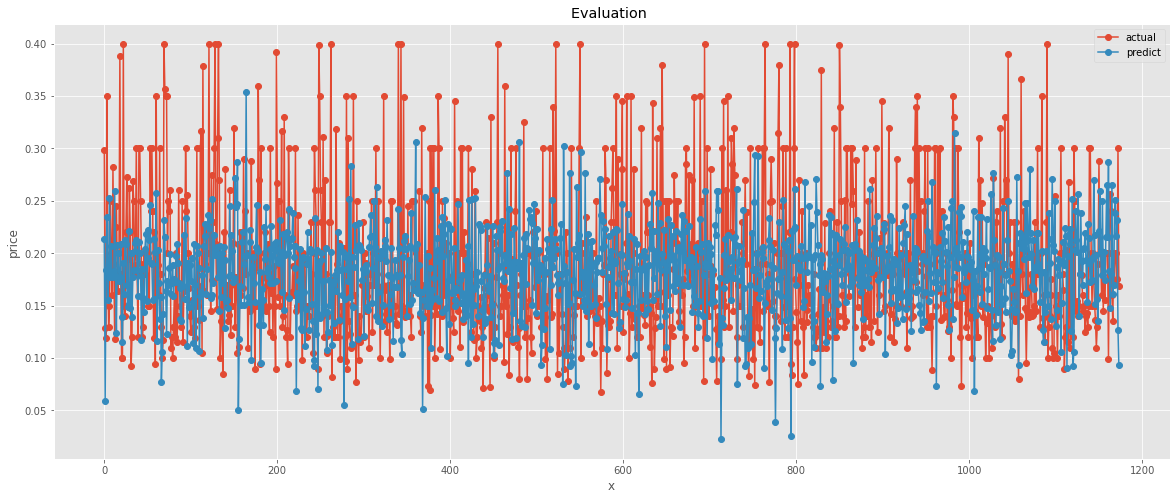

In [58]:
plt.figure(figsize=(20,8)) 
plt.plot( y2, label = "actual",marker = 'o')
plt.plot( y1, label = "predict",marker = 'o')
plt.xlabel('x')
# Set the y axis label of the current axis.
plt.ylabel('price')
# Set a title of the current axes.
plt.title('Evaluation ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

# 5. Reflection

**Khó khăn:** 

* Đầu tiên là về việc thu thập dữ liệu. Bộ dữ liệu từ opensea bị thiếu khá nhiều thuộc tính nên đã phải thêm data thay thế cho phần model, cũng như vấn đề ko bypass captcha được trực tiếp trên trang chủ của Axie infinity.

* Thứ hai là phần model mất khá nhiều thời gian để chỉnh sửa các siêu tham số cho phù hợp ( hàm kích hoạt, số layer, gradient value clipping, hàm loss, .... ).

* Thứ ba là bộ data thay thế cũng không hoàn toàn được lấy chính xác mà ta chỉ số thể lấy được giá sàn của item bởi vì ko bypass được captcha.

**Kinh nghiệm**

* Cách sử dụng các loại tool như : mongodb, git desktop ,..

* Phân bổ thời gian hợp lý.

* Sử dụng các module mới để code. Hoàn toàn loại bỏ thủ công và cực kỳ dễ nhìn và chỉnh sửa.

# 6. Reference

[1] https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

[2] https://axieinfinity.com/

[3] https://docs.opensea.io/reference/api-overview

[4] https://www.pytorchlightning.ai/

[5] https://docs.mongodb.com/tools/

[6] https://www.phamduytung.com/blog/2019-05-05-deep-learning-dropout/

[7] https://machinelearningcoban.com/tabml_book/ch_data_processing/process_outliers.html#